# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # is a Python library built on top of Matplotlib that provides a high-level interface for creating statistical graphics. Its main purpose is to simplify the creation of attractive and informative visualizations for data exploration, understanding, and communication.

## Importing the dataset

In [2]:
dataset = pd.read_csv('car_data.csv')
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
# Information about the dataset, including data types and null values
dataset.info()

# Shape of the dataset (number of rows and columns)
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


(1000, 5)

In [4]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

## Encoding the Independent Variable

In [5]:
# Apply one-hot encoding to the categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
dataset_encoded = ct.fit_transform(dataset)

# Create a Pandas DataFrame with the encoded data
dataset_encoded_df = pd.DataFrame(dataset_encoded)
dataset_encoded_df.head()

,0,1,2,3,4,5
0,0.0,1.0,385.0,35.0,20000.0,0.0
1,0.0,1.0,681.0,40.0,43500.0,0.0
2,0.0,1.0,353.0,49.0,74000.0,0.0
3,0.0,1.0,895.0,40.0,107500.0,1.0
4,0.0,1.0,661.0,25.0,79000.0,0.0


In [6]:
# Get the new column names after one-hot encoding
dataset_names_encoded = ct.named_transformers_['encoder'].get_feature_names_out() # This line retrieves the names of the new features created by the one-hot encoding process.

# Concatenate with the non-encoded column names
column_names = dataset_names_encoded.tolist() + ['User ID', 'Age', 'AnnualSalary', 'Purchased'] # This line combines the new encoded feature names with the original names of the non-encoded columns.

# Create a Pandas DataFrame with the encoded data and column names
dataset_encoded_df = pd.DataFrame(dataset_encoded, columns=column_names)
dataset_encoded_df.head()

,Gender_Female,Gender_Male,User ID,Age,AnnualSalary,Purchased
0,0.0,1.0,385.0,35.0,20000.0,0.0
1,0.0,1.0,681.0,40.0,43500.0,0.0
2,0.0,1.0,353.0,49.0,74000.0,0.0
3,0.0,1.0,895.0,40.0,107500.0,1.0
4,0.0,1.0,661.0,25.0,79000.0,0.0


In [7]:
# Descriptive statistics of the dataset with styled background gradient
dataset_encoded_df.describe().style.background_gradient(cmap = "Purples")

,Gender_Female,Gender_Male,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.516000,0.484000,500.500000,40.106000,72689.000000,0.402000
std,0.499994,0.499994,288.819436,10.707073,34488.341867,0.490547
min,0.000000,0.000000,1.000000,18.000000,15000.000000,0.000000
25%,0.000000,0.000000,250.750000,32.000000,46375.000000,0.000000
50%,1.000000,0.000000,500.500000,40.000000,72000.000000,0.000000
75%,1.000000,1.000000,750.250000,48.000000,90000.000000,1.000000
max,1.000000,1.000000,1000.000000,63.000000,152500.000000,1.000000


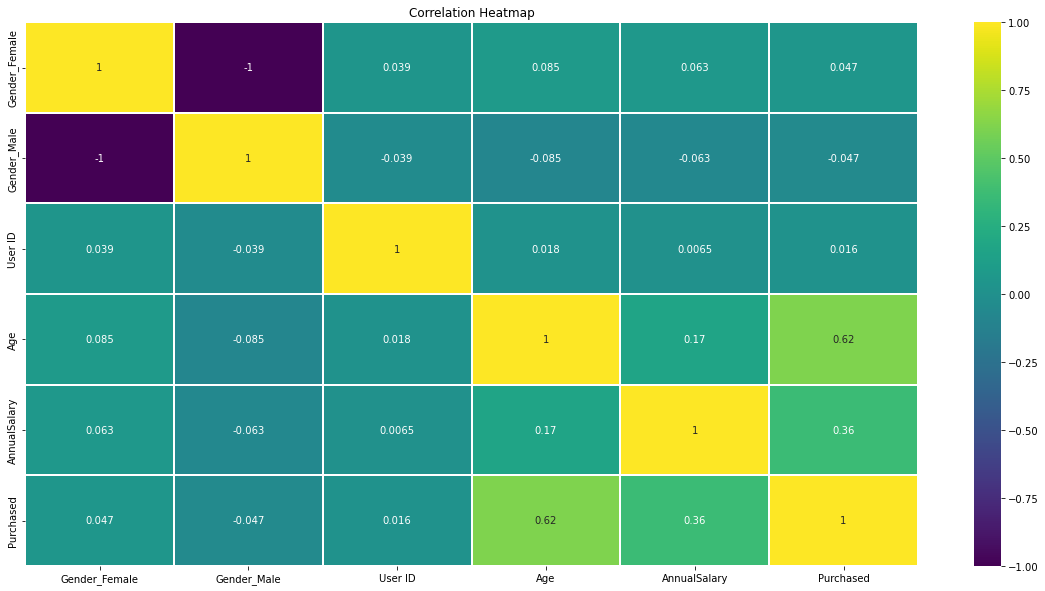

In [8]:
# Visualize the correlation between all features using a heatmap

plt.figure(figsize=(20,10)) # Make the figure will be 20 inches wide and 10 inches high.
sns.heatmap(dataset_encoded_df.corr(), cmap="viridis",annot=True,linewidths=0.1) # dataset.corr(): Calculates the correlation matrix of the dataset's numerical features. # cmap="viridis": Colormap used (here, viridis). # annot=True: Displays correlation values within each cell. # linewidths=0.1: Sets the width of the grid lines.
plt.title('Correlation Heatmap')
plt.show()

## Extracting features (X) and target variable (y) from the dataset

In [9]:
X = dataset_encoded_df.iloc[:, 3:-1].values
y = dataset_encoded_df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (750, 2) (750,)
Test set: (250, 2) (250,)


In [11]:
print(X_train)

[[2.000e+01 2.050e+04]
 [5.000e+01 2.550e+04]
 [5.100e+01 1.365e+05]
 ...
 [6.100e+01 8.450e+04]
 [3.000e+01 6.200e+04]
 [1.900e+01 4.550e+04]]


In [12]:
print(y_train)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.

In [13]:
print(X_test)

[[5.400e+01 1.365e+05]
 [4.100e+01 6.750e+04]
 [5.000e+01 2.950e+04]
 [2.000e+01 8.600e+04]
 [2.700e+01 3.150e+04]
 [3.600e+01 4.850e+04]
 [4.000e+01 9.750e+04]
 [5.100e+01 4.550e+04]
 [5.500e+01 7.150e+04]
 [2.800e+01 8.950e+04]
 [4.700e+01 8.050e+04]
 [1.900e+01 2.100e+04]
 [3.500e+01 4.450e+04]
 [2.700e+01 3.100e+04]
 [4.600e+01 3.350e+04]
 [4.900e+01 3.600e+04]
 [3.300e+01 6.000e+04]
 [5.200e+01 6.750e+04]
 [4.200e+01 1.080e+05]
 [3.400e+01 3.250e+04]
 [3.200e+01 6.750e+04]
 [3.800e+01 5.850e+04]
 [2.700e+01 8.250e+04]
 [5.100e+01 9.850e+04]
 [5.500e+01 1.405e+05]
 [4.100e+01 7.250e+04]
 [3.700e+01 7.500e+04]
 [3.900e+01 4.200e+04]
 [3.800e+01 1.455e+05]
 [4.000e+01 4.350e+04]
 [4.000e+01 8.050e+04]
 [4.100e+01 7.350e+04]
 [2.900e+01 8.650e+04]
 [2.700e+01 8.800e+04]
 [2.500e+01 8.000e+04]
 [3.700e+01 5.200e+04]
 [2.600e+01 8.050e+04]
 [3.400e+01 7.200e+04]
 [3.800e+01 7.100e+04]
 [5.800e+01 1.275e+05]
 [3.600e+01 7.650e+04]
 [4.700e+01 2.350e+04]
 [5.400e+01 3.550e+04]
 [3.800e+01

In [14]:
print(y_test)

[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[-1.92084369 -1.50249061]
 [ 0.91133082 -1.35965201]
 [ 1.00573664  1.81136479]
 ...
 [ 1.94979481  0.3258434 ]
 [-0.97678552 -0.31693027]
 [-2.01524951 -0.78829764]]


In [17]:
print(X_test)

[[ 1.28895409  1.81136479]
 [ 0.06167847 -0.15980782]
 [ 0.91133082 -1.24538114]
 [-1.92084369  0.36869498]
 [-1.26000297 -1.1882457 ]
 [-0.41035062 -0.70259448]
 [-0.03272735  0.69722375]
 [ 1.00573664 -0.78829764]
 [ 1.3833599  -0.04553694]
 [-1.16559715  0.468682  ]
 [ 0.62811337  0.21157253]
 [-2.01524951 -1.48820675]
 [-0.50475643 -0.81686535]
 [-1.26000297 -1.20252956]
 [ 0.53370755 -1.13111026]
 [ 0.816925   -1.05969097]
 [-0.69356807 -0.37406571]
 [ 1.10014245 -0.15980782]
 [ 0.15608428  0.9971848 ]
 [-0.59916225 -1.15967798]
 [-0.78797389 -0.15980782]
 [-0.22153898 -0.41691729]
 [-1.26000297  0.26870796]
 [ 1.00573664  0.72579147]
 [ 1.3833599   1.92563566]
 [ 0.06167847 -0.01696923]
 [-0.3159448   0.05445007]
 [-0.12713317 -0.88828465]
 [-0.22153898  2.06847426]
 [-0.03272735 -0.84543307]
 [-0.03272735  0.21157253]
 [ 0.06167847  0.01159849]
 [-1.07119134  0.38297884]
 [-1.26000297  0.42583042]
 [-1.4488146   0.19728867]
 [-0.3159448  -0.60260746]
 [-1.35440879  0.21157253]
 

## Training the Decision Tree Classification model on the Training set

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [19]:
print(classifier.predict(sc.transform([[30,87000]])))

[0.]


## Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 

## Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[138  14]
 [ 16  82]]


0.88

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


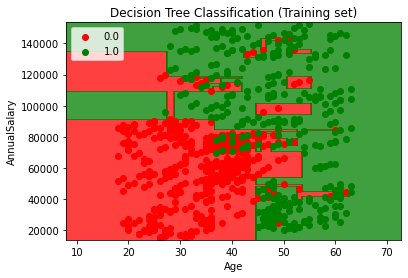

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


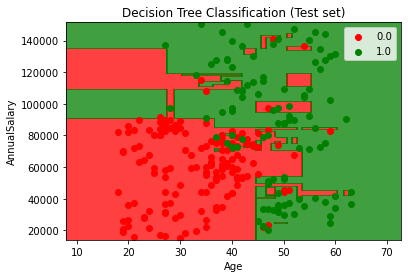

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.legend()
plt.show()